In [1]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from kuramoto.db_metrics import *
from kuramoto.SDL_BCD import *
from kuramoto.SDL_SVP import *
from NNetwork import NNetwork as nn
import networkx as nx

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

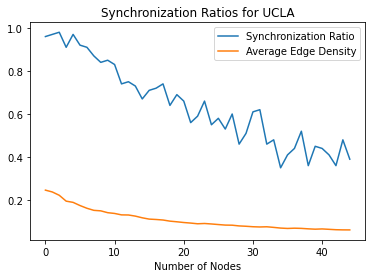

<Figure size 432x288 with 0 Axes>

In [10]:
sampling_alg = 'pivot'
ntwk = 'UCLA26'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]   
    path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)    
    
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 2.5
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for UCLA')
plt.show()
plt.savefig('./images/UCLA/sync_ratio_50.png', dpi=1200)

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

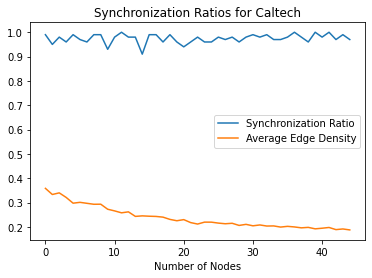

In [14]:
sampling_alg = 'pivot'
ntwk = 'Caltech36'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]   
    path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)    
    
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 1
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for Caltech')
plt.show()

In [20]:
NWS = nx.newman_watts_strogatz_graph(20000, 1000, 0.67)
new_nodes = {e: n for n, e in enumerate(NWS.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in NWS.edges]
edgelist = []
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = nn.NNetwork()
G.add_edges(edgelist)

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

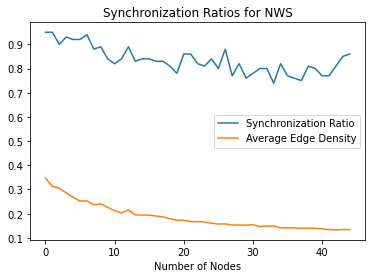

In [24]:
sampling_alg = 'pivot'

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]
    
    G = nn.NNetwork()
    G.add_edges(edgelist)
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 0.8
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for NWS')
plt.show()